In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy  as np



# Data collection and processing

In [2]:
cf = pd.read_csv('./calories.csv')
cf.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [3]:
df = pd.read_csv('./exercise.csv')
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [4]:
# We need to distinguish between calries burnt b/w different exercises
# So a person walking will burn less calories than a person jogging and vice versa
# We will distinguish that by the heart-rate

# Combining the Calories column with the exercise table

df =pd.concat([df, cf['Calories']], axis=1)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [5]:
#  Checking the number of rows and columns
df.shape

(15000, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [7]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

# Data Analysis

Getting some stats about our data

In [8]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [9]:
# Data visualization
sns.set()

C:\Users\Rahul\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

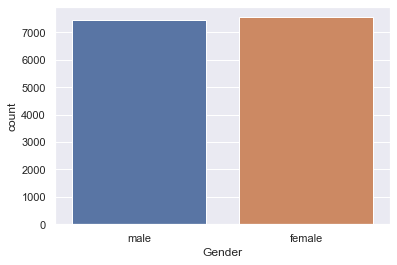

In [10]:
# countplot for gender
# We use countplot for gender as it has only 2 classification
# We cannot use count for columns like age or height
sns.countplot('Gender', data=df)

C:\Users\Rahul\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

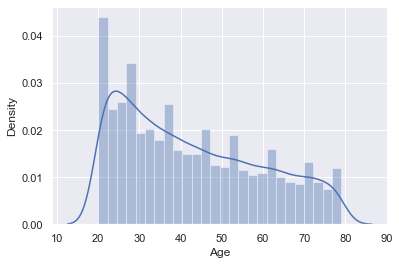

In [11]:
# Distribution plot of age column
sns.distplot(df['Age'])

C:\Users\Rahul\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

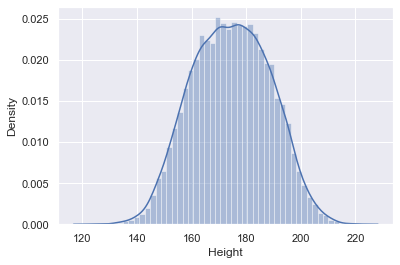

In [12]:
sns.distplot(df['Height'])

C:\Users\Rahul\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

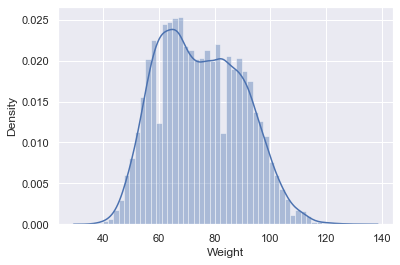

In [13]:
 sns.distplot(df['Weight'])

 Finding the correlation in the dataset. There are 2 types
 1.Positive correlation Ex-(duration directly prop to calories)
 2.Negative correlation 

In [14]:
correlation = df.corr()
# df.head()


<AxesSubplot:>

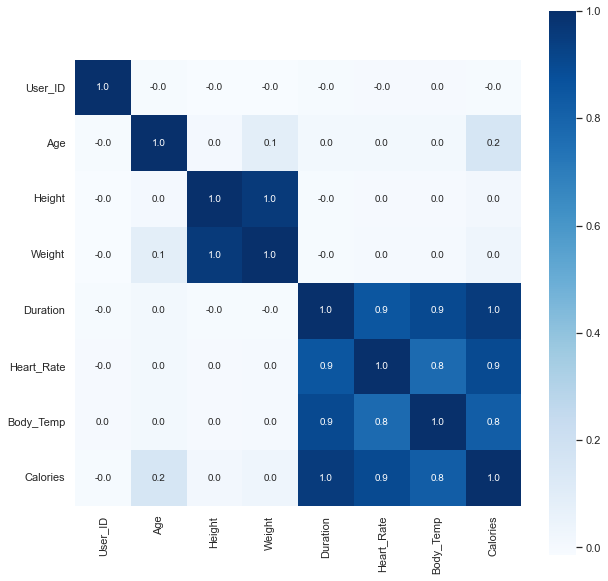

In [15]:
# Constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 10}, cmap='Blues')
# plt.show()

In [16]:
# Replacing gender column with 0=male, 1=female
df.replace({'Gender': {'male': 0, 'female': 1}}, inplace=True)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [17]:
# Splitting features into X and target into Y
X = df.drop(columns=['User_ID', 'Calories'], axis=1)
Y = df['Calories']

In [18]:
X

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0,40.4
14996,1,27,165.0,65.0,6.0,85.0,39.2
14997,1,43,159.0,58.0,16.0,90.0,40.1
14998,0,78,193.0,97.0,2.0,84.0,38.3


In [19]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.3, random_state=4)

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (10500, 7) (4500, 7)


# Model Training(XG Boost Regressor)

In [22]:
# Loading the model
model = XGBRegressor()

In [23]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [24]:
# Model Evaluation
test_data_predict = model.predict(X_test)

In [25]:
print(test_data_predict)

[106.330086  77.675415 143.27747  ... 175.35962  116.18173  117.22966 ]


In [26]:
# Comparing test data predict and original value Y_test
# For this we will use Mean Absolute Error
mae  = metrics.mean_absolute_error(Y_test, test_data_predict)

In [27]:
print("Mean Absolute Error : ",mae)

Mean Absolute Error :  1.5237530896812677


# Predictive System

In [38]:
def prediction(x):
    # Changing it to a numpy array
    input_arr = np.asarray(x, dtype=np.float32)
    print("Your info :-\nGender : ",input_arr[0],"\nAge : ",input_arr[1],"\nHeight in cm : ",input_arr[2],"\nWeight : ",input_arr[3],"\nDuration of Training : ",input_arr[4],"\nHeart Rate : ",input_arr[5],"\nBody Temperature : ",input_arr[6])
    # Reshaping 
    input_arr_reshaped = input_arr.reshape(1, -1)
    prediction = model.predict(input_arr_reshaped)
#     print(prediction)
    return prediction
    
   





In [ ]:
print("Please Enter your : \n Gender \n Age \n Height(cm) \n Weight \n Duration of Workout \n Heart Rate \n Body Temperature\n\n\n\n")


# print("The amount calories you have burned are : ",prediction([0,68,190.0,94.0,29.2,105.0,40.8]))
# input_data = input()
# for i 
# prediction(input_data)




input_data = input().split(",")
# calorie_input = []
# for i in input_data:
#     calorie_input.append(i)
# print(calorie_input)
prediction(input_data)


# print(type(input_data))
# # Changing it to a numpy array
# input_arr = np.asarray(input_data)

# # Reshaping 
# input_arr_reshaped = input_arr.reshape(1, -1)
# prediction = model.predict(input_arr_reshaped)
# print(prediction)

Please Enter your : 
 Gender 
 Age 
 Height(cm) 
 Weight 
 Duration of Workout 
 Heart Rate 
 Body Temperature




